
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
# Contenido:

1. [Respuesta al Ejercicio Nro. 1](#RESPUESTAS-AL-EJERCICIO-1:)
2. [Respuesta al Ejercicio Nro. 2](#RESPUESTAS-AL-EJERCICIO-2:)

---
## Trabajo práctico entregable - Parte 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [5]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [6]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:15]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

---

# RESPUESTAS AL EJERCICIO 1:

## *1.   Seleccionar las columnas relevantes para analizar.*

In [10]:
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

Otra opción es df.info() para elegir las columnas relevantes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

De las 6095 encuestas se vé que para salary_monthly_NETO respondieron 5883 y para salary_monthly_BRUTO respondieron todos. De acuerdo a esto se puede analizar mas datos si respondemos la pregunta por el sueldo BRUTO.

Elijo las siguientes variables/columnas:

In [12]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO','salary_monthly_BRUTO', 'salary_in_usd']

## *2. Seleccionar las filas relevantes para analizar. Esto incluye:*

*   *la eliminación de valores extremos y erróneos,*
*   *pero también puede enfocar el análisis en una sub-población. Por ejemplo,se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science"* 

***Pero deben justificar su elección y reformular la pregunta inicial de ser necesario.***

*   *Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.*
*   *Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.*




### A) Para responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?** Deberíamos responder primero **¿Cuáles son los mejores salarios?** Por lo tanto primero voy a ver los valores y forma que tienen los datos en las columna 'salary_monthly_BRUTO'

In [13]:
salary_col='salary_monthly_BRUTO'

In [14]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

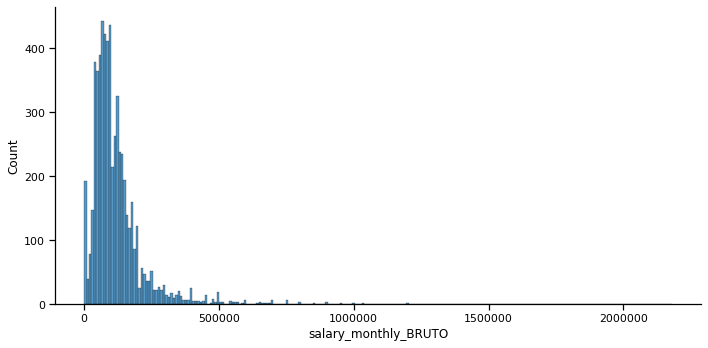

In [15]:
sns.displot(df[salary_col], aspect=2) #cambiar los bins=5,20 0 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

Para la variable "salary_monthly_BRUTO" Se vé que:

* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 2M.
* La mayoría de los valores se condensa por debajo de los 250K, y pocos superan los 500K.
* Los valores más frencuentes aparentan estar cerca de los 100K.
* Hay un pico de ocurrencias en el valor 0.
 y brindan poco detalle.


Reduzco primero el df solo con las columnas de interes.

In [16]:
df_interes = df[relevant_columns]
df_interes[:3]

,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_in_usd
0,Ninguno,43000.0,53000.0,NaN
1,"HTML, Javascript, Python",63000.0,79000.0,NaN
2,Ninguno,127000.0,160000.0,NaN


Me interesa saber cuántos outliers tiene la variable 'salary_monthly_BRUTO' en el dataframe original. Para esto, tomamos como outliers aquellos valores que superan el valor del cuartil 3 mas 1,5 veces el rango inter cuartil y aquellos valores que están por debajo del valor del cuartil 1 menos 1,5 veces el rango inter cuartil.

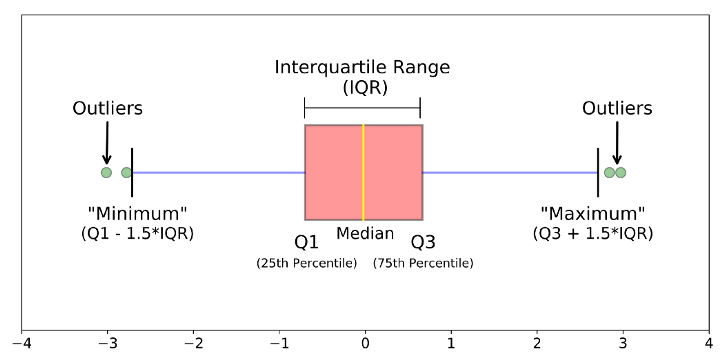

Para eso defino 2 métodos:

In [17]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

In [18]:
def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name) #cual es la función de _, _, _, _,?
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

Ahora le paso el df y la columna de salario a estos métodos

In [19]:
_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df_interes, salary_col)

In [20]:
# %% Count the outliers in the original data frame
print(f"La columna {salary_col} tiene {count_outliers(df_interes, salary_col)} outliers")

La columna salary_monthly_BRUTO tiene 398 outliers


Voy a eliminar ahora estos outliers, para ello defino el método "remove_outliers" y luego defino dos métodos para visualizar su eliminación.

In [21]:
def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

In [22]:
def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

In [23]:
def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

Elimino los outliers

In [24]:
# %% Remove the outliers
print(f"Cantidad de encuestas antes de eliminar outliers en el salario {salary_col}: {df_interes.shape[0]}")
df_interes_sin_outliers = remove_outliers(df_interes, salary_col)
print(f"Cantidad de encuestas posterior a eliminar outliers en el salario {salary_col}: {df_interes_sin_outliers.shape[0]}")

Cantidad de encuestas antes de eliminar outliers en el salario salary_monthly_BRUTO: 6095
Cantidad de encuestas posterior a eliminar outliers en el salario salary_monthly_BRUTO: 5697


Una vez eliminados los outliers, comparo la forma de los datos antes y despues para corroborar.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


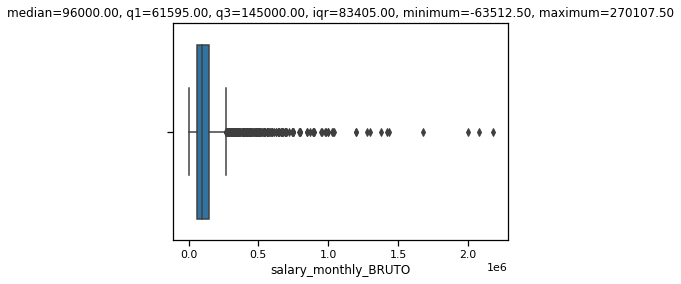

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


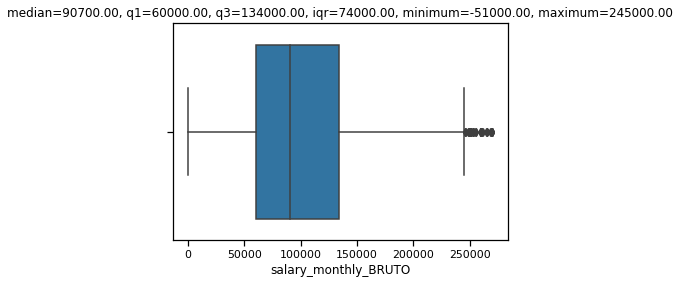

In [25]:
# Let's have a look at the end-result. Here is something very strange though, our data still appears to have outliers!
box_and_whisker(df_interes, salary_col)
box_and_whisker(df_interes_sin_outliers, salary_col)

Veo que he eliminado valores atípicos en función del mínimo y máximo del dataframe original, pero sigo teniendo valores atípicos para los nuevos mínimo y máximo.

In [26]:
#Cuento los outliers en el df filtrado
print(f"La columna {salary_col} tiene {count_outliers(df_interes_sin_outliers, salary_col)} outliers")

La columna salary_monthly_BRUTO tiene 99 outliers


Para eliminar todos los outliers voy a definir otra función auxiliar, esta función auxiliar llamará a "remove_outliers" repetidamente hasta que se hayan eliminado todos los valores atípicos.

In [27]:
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in

Procedo a eliminar todos los outliers.

In [28]:
df_interes_sin_outliers = remove_all_outliers(df_interes_sin_outliers,salary_col)

In [29]:
#Cuento los outliers en el df filtrado
print(f"La columna {salary_col} tiene {count_outliers(df_interes_sin_outliers, salary_col)} outliers")

La columna salary_monthly_BRUTO tiene 0 outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


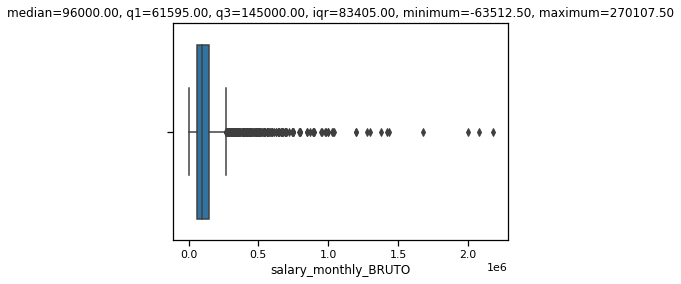

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


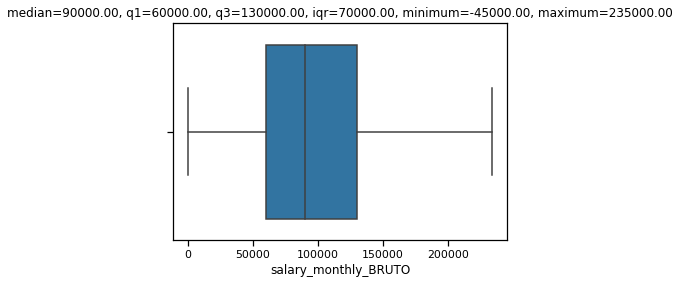

In [30]:
box_and_whisker(df_interes, salary_col)
box_and_whisker(df_interes_sin_outliers, salary_col)

In [31]:
print(f"Cantidad de encuestas antes de eliminar outliers en el salario {salary_col}: {df_interes.shape[0]}")
print(f"Cantidad de encuestas posterior a eliminar outliers en el salario {salary_col}: {df_interes_sin_outliers.shape[0]}")

Cantidad de encuestas antes de eliminar outliers en el salario salary_monthly_BRUTO: 6095
Cantidad de encuestas posterior a eliminar outliers en el salario salary_monthly_BRUTO: 5560


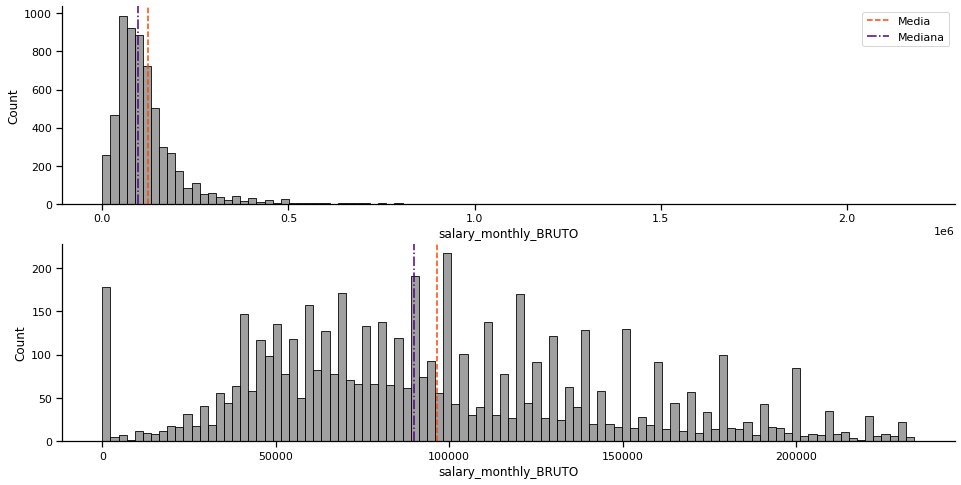

In [32]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
sns.histplot(df_interes[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df_interes[salary_col].mean(), color='orangered',
                linestyle='--', label='Media')
axes[0].axvline(df_interes[salary_col].median(), color='indigo',
                linestyle='-.', label='Mediana')

sns.histplot(df_interes_sin_outliers[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(df_interes_sin_outliers[salary_col].mean(), color='orangered',
                linestyle='--', label='Media')
axes[1].axvline(df_interes_sin_outliers[salary_col].median(), color='indigo',
                linestyle='-.', label='Mediana')

axes[0].legend()
sns.despine()

Vemos que dentro de los salarios mas altos hay un pico de frecuencia alrededor de ARS 200.000, un criterio podría ser tomar los mejores salarios como aquellos mayores o iguales a ARS 200.000. 



Para dejar en el dataframe, con este criterio, solo las encuenstas asociadas a los mejores salarios hago:

In [33]:
df_interes_sin_outliers_ms = df_interes_sin_outliers [df_interes_sin_outliers[salary_col]>=200000]

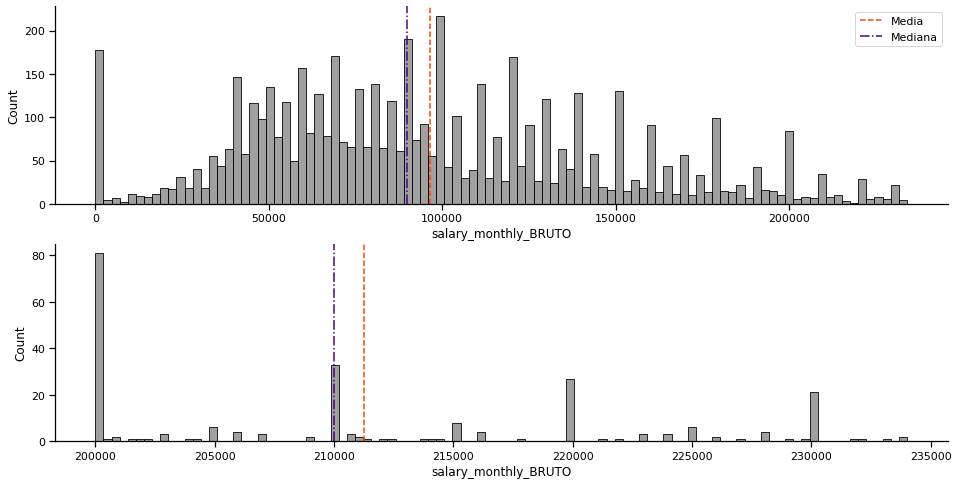

In [34]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
sns.histplot(df_interes_sin_outliers[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df_interes_sin_outliers[salary_col].mean(), color='orangered',
                linestyle='--', label='Media')
axes[0].axvline(df_interes_sin_outliers[salary_col].median(), color='indigo',
                linestyle='-.', label='Mediana')

sns.histplot(df_interes_sin_outliers_ms[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(df_interes_sin_outliers_ms[salary_col].mean(), color='orangered',
                linestyle='--', label='Media')
axes[1].axvline(df_interes_sin_outliers_ms[salary_col].median(), color='indigo',
                linestyle='-.', label='Mediana')

axes[0].legend()
sns.despine()

In [35]:
df_interes_sin_outliers_ms.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 135 to 6063
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tools_programming_languages  240 non-null    object 
 1   salary_monthly_NETO          219 non-null    float64
 2   salary_monthly_BRUTO         240 non-null    float64
 3   salary_in_usd                53 non-null     object 
dtypes: float64(2), object(2)
memory usage: 9.4+ KB


##*3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas.*
Elejimos la opción de comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante

Como los lenguajes de programación están separados por coma en la columna "tools_programming_languages" voy a separar los lenguajes de programación en distintas filas pero que conserven el número de índice para indicar que corresponden a la misma encuesta. 

Se define el método:

In [36]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

Se crea una nueva columna en el dataframe para que contenga la lista de lenguajes:

In [37]:
# Create a new column with the list of languages
df_interes_sin_outliers_ms.loc[:, 'cured_programming_languages'] = df_interes_sin_outliers_ms.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Se duplica cada fila del dataframe para cada lenguaje de programación mencionado en la encuesta:

In [38]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang_ms = df_interes_sin_outliers_ms.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

Veamos cómo quedaron estructuradas las primeras líneas del dataframe:

In [39]:
df_lang_ms[:15]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
135,bash/shell,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,html,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,php,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,python,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
139,python,Python,100000.0,200000.0,NaN,[python]
153,.net,".NET, C#, CSS, HTML, Javascript, SQL, TypeScript",200000.0,230000.0,Mi sueldo está dolarizado,"[.net, c#, css, html, javascript, sql, typescr..."
153,c#,".NET, C#, CSS, HTML, Javascript, SQL, TypeScript",200000.0,230000.0,Mi sueldo está dolarizado,"[.net, c#, css, html, javascript, sql, typescr..."
153,css,".NET, C#, CSS, HTML, Javascript, SQL, TypeScript",200000.0,230000.0,Mi sueldo está dolarizado,"[.net, c#, css, html, javascript, sql, typescr..."
153,html,".NET, C#, CSS, HTML, Javascript, SQL, TypeScript",200000.0,230000.0,Mi sueldo está dolarizado,"[.net, c#, css, html, javascript, sql, typescr..."
153,javascript,".NET, C#, CSS, HTML, Javascript, SQL, TypeScript",200000.0,230000.0,Mi sueldo está dolarizado,"[.net, c#, css, html, javascript, sql, typescr..."


Voy a eliminar algunas filas que no corresponden a un lenguaje de programación.

In [55]:
filtro= df_lang_ms['programming_language'] != 'ninguno'
filtro2= df_lang_ms['programming_language'] != 'no' 
filtro3= df_lang_ms['programming_language'] != 'soy'
filtro4= df_lang_ms['programming_language'] != 'programador'
filtro5= df_lang_ms['programming_language'] != 'recruiter'
filtro6= df_lang_ms['programming_language'] != 'programo'
filtro7= df_lang_ms['programming_language'] != 'plataforma'
filtro8= df_lang_ms['programming_language'] != 'del'
filtro9= df_lang_ms['programming_language'] != 'cliente'
df_lang_ms_filtrado = df_lang_ms[filtro & filtro2 & filtro3 & filtro4 & filtro5 & filtro6 & filtro7 & filtro8 & filtro9]
df_lang_ms_filtrado.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_in_usd,cured_programming_languages
135,bash/shell,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,html,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,php,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
135,python,"Bash/Shell, HTML, PHP, Python",170000.0,200000.0,NaN,"[bash/shell, html, php, python]"
139,python,Python,100000.0,200000.0,NaN,[python]


Puedo graficar ahora una comparativa de diagramas de caja entre las variabes de lenguaje de programación y salario bruto, como para observar, de los mejores sueldos, qué lenguajes de programación ganan por encima de la media:

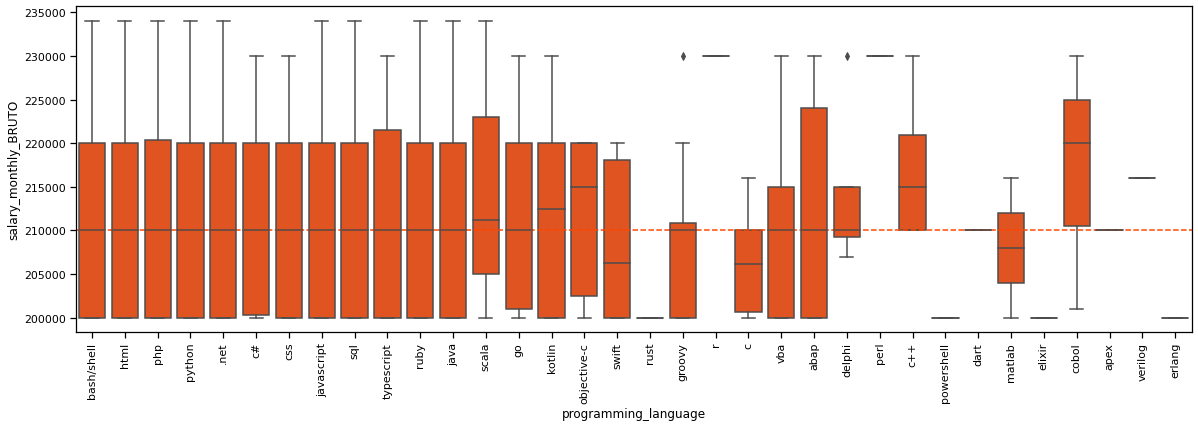

In [56]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_lang_ms_filtrado, x = 'programming_language', y = salary_col,
                color='orangered')
#plt.tick_params(labelrotation=90)
plt.xticks(rotation = 90) 
plt.axhline(df_lang_ms_filtrado[salary_col].median(), color='orangered', linestyle='--', label='Media')

En esta visualizacion se puede observar que:

*   Hay una media bastante clara en los salarios brutos de los lenguajes con mejor salario: ARS 210.000.
*   Se puede observar que hay algunos lenguajes cuyos sueldos brutos están por encima de la media y son (de mayor a menor sueldo bruto medio):

>1.   Perl y R
2.   Cobol
3.   Verilog
4.   Objective C, C++











>## *Respuesta:*
*Los lenguajes de programación asociados a los mejores salarios son: Perl, R, Cobol, Verilog, Objective C y C++*

---

# RESPUESTAS AL EJERCICIO 2:

## Densidades y varias varialbes

**¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

> Una de las herramientas más útiles para explortar la base y descubrir patrones son los gráficos. En este ejercicio se utilizan:
>
> * Histogramas: Permiten entender la distrubución de una variable.
> * Scatter plots: Permite entender la relación entre dos variables y apreciar patrones y correlaciones.
>
> En lo que a herramientas teóricas se refiere, la estadística descriptiva provee modos de capturar propiedades de un conjunto o muestra de datos. Esto resume los datos observados en elementos tales como la media, mediana, valores mínimos y máximos, sesgo (skew), correlaciones, etc.

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

> **NOTA**: Las selección de columnas relevantes (variables) y filas relevantes se detalla en los apartados a), b), c) y d) de este ejercicio.

## a) Densidad conjunta

¿Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

> Herramientas visuales: Histogramas y scatter plots.
>
> Modelos: Transformación de datos mediante aplicación de logaritmos en base 10.

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

> Vamos a visualizar la base según el salario bruto y neto. (A los fines de la solución de este práctico estas son las _varias variables_)

> * Variables Numéricas:
>    - salary_monthly_BRUTO
>    - salary_monthly_NETO
>    - profile_years_experience
> * Variables categóricas:
>    - salary_in_usd
>    - work_contract_type
>    - profile_studies_level
>    - tools_programming_languages
> 
> A los fines de facilitar el análisis se genera un nuevo dataframe que contiene solamente las columnas relevantes.
> Para analizar el comportamiento de los datos se utilizan histogramas y escatter plots para analizar correlaciones.
> Asimismo se realiza el siguiente procesamiento de datos:
> * Se reemplazan los datos nulos (NaN) por 0 (cero)
> * A los fines de facilitar el tratamiento de los datos, los valores de la columna _salary_in_usd_ se les asignan velores _1 (True)_ y _0 (False)_.
> * A los fines de poder hacer comparaciones útiles se crea una variable ficticia (_dummie variable_) llamada _full_time_ con valores _1 (True)_ para casos de trabajo full time y _0 (False)_ para el resto de los casos.
> * Se agrega una columna `'rel_bruto_neto'` con la relación $ \frac {salary.monthly.BRUTO} {salary. monthly.NETO \ + \ 1} $
> * Se agrega otra columna `'cant_lenguajes'` que contiene la cantidad de lenguajes que sabe programar el encuestado.
>
> **NOTA**: La adición de 1 al denominador de la relación salario bruto a salario neto tiene como fin evitar la división por cero. Como se trata de valores grandes de salarios no impacta en los resultados.

In [ ]:
relev_cols = ["salary_monthly_BRUTO",
              "salary_monthly_NETO",
              "profile_years_experience",
              "cured_programming_languages",
              "salary_in_usd",
              "work_contract_type",
              "profile_studies_level",
              "tools_programming_languages"]
df2 = df[relev_cols]
condicion = df2 != "Mi sueldo está dolarizado"
df2 = df2.where(condicion, 1)
df2.fillna(value=0, inplace=True)
df2["rel_bruto_neto"] = df2.salary_monthly_BRUTO / (df2.salary_monthly_NETO + 1)
df2["full_time"] = pd.get_dummies(df2.work_contract_type)["Full-Time"]
df2['cant_lenguajes'] = df2.cured_programming_languages.apply(lambda cant: len(cant))
df2.head()

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,cured_programming_languages,salary_in_usd,work_contract_type,profile_studies_level,tools_programming_languages,rel_bruto_neto,full_time,cant_lenguajes
0,53000.0,43000.0,3.0,[ninguno],0,Full-Time,Universitario,Ninguno,1.232529,1,1
1,79000.0,63000.0,5.0,"[html, javascript, python]",0,Full-Time,Universitario,"HTML, Javascript, Python",1.253948,1,3
2,160000.0,127000.0,2.0,[ninguno],0,Full-Time,Secundario,Ninguno,1.259833,1,1
3,130000.0,102000.0,15.0,"[bash/shell, c, css, html, java, javascript, p...",0,Full-Time,Posgrado,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",1.274497,1,9
4,140000.0,106000.0,9.0,"[css, html, javascript, sql, typescript]",0,Full-Time,Universitario,"CSS, HTML, Javascript, SQL, TypeScript",1.320742,1,5


Para la selección de las **filas relevantes** se realiza previamente una exploración gráfica de los datos.

Esa exploración gráfica consiste en el análisis de salarios brutos y netos.

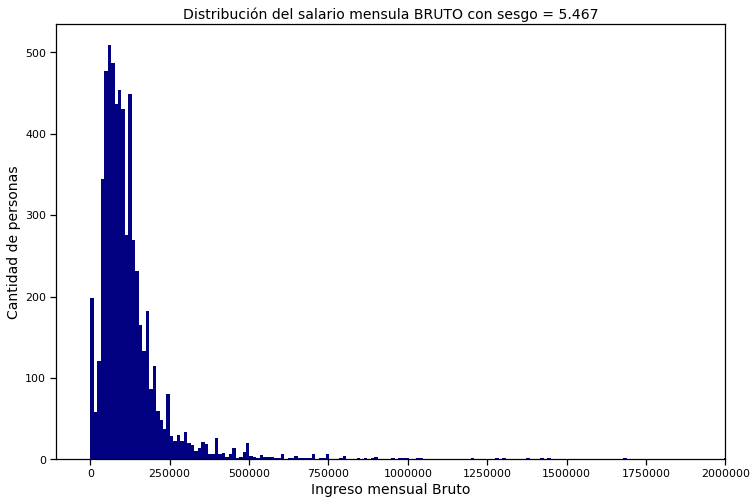

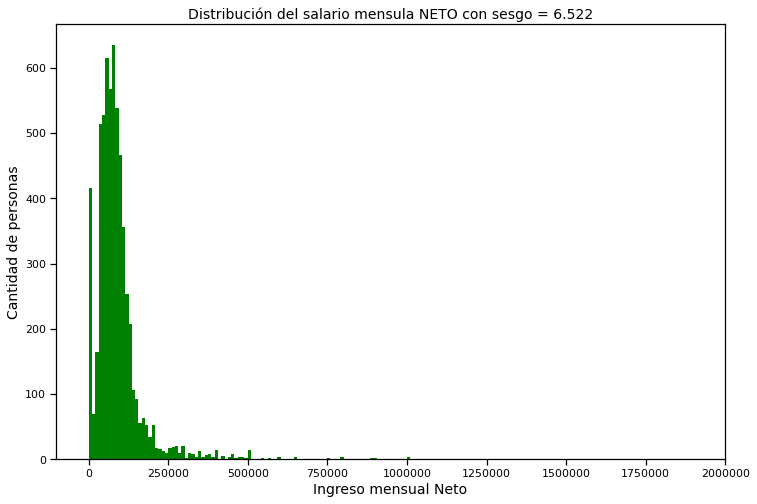

,Sin filtrado
Mediana del bruto,96000.000000
Mediana del neto,75000.000000
Media del bruto,124058.549621
Media del neto,91606.803046


In [ ]:
sesgo_sal_bruto = df2.salary_monthly_BRUTO.skew()

plt.figure(figsize=(12,8))
plt.hist(df2.salary_monthly_BRUTO, bins=200, color='navy')
plt.ticklabel_format(style='plain', axis='x')
plt.title(f'Distribución del salario mensula BRUTO con sesgo = {sesgo_sal_bruto:.3f}', fontsize=14)
plt.xlabel('Ingreso mensual Bruto', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.xlim(right=2000000)
plt.show()

sesgo_sal_neto = df2.salary_monthly_NETO.skew()

plt.figure(figsize=(12,8))
plt.hist(df2.salary_monthly_NETO, bins=200, color='green')
plt.ticklabel_format(style='plain', axis='x')
plt.title(f'Distribución del salario mensula NETO con sesgo = {sesgo_sal_neto:.3f}', fontsize=14)
plt.xlabel('Ingreso mensual Neto', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.xlim(right=2000000)
plt.show()

ind = ['Mediana del bruto', 'Mediana del neto', 'Media del bruto', 'Media del neto']

resumen = pd.DataFrame([df2.salary_monthly_BRUTO.median(),
                        df2.salary_monthly_NETO.median(),
                        df2.salary_monthly_BRUTO.mean(),
                        df2.salary_monthly_NETO.mean()], columns=['Sin filtrado'], index=ind)

resumen

> Una primera lectura de los datos lleva a las siguientes observaciones:
> * Hay mayor sesgo de los salarios netos que de los brutos.
> * Hay mayor cantidad de valores casi nulos en los salarios netos que en los brutos.
>
> Sumado al hecho de que se poseen en 100% de los registros de los salarios brutos, estas primeras observaciones llevan a la preferencia del uso de los salarios brutos por sobre los netos.
>
> A los fines de facilitar la interpretación de los valores de salarios brutos y netos y permitir captar escalas de magnitudes y valores extremos se grafican los histogramas en escala logarítmica.

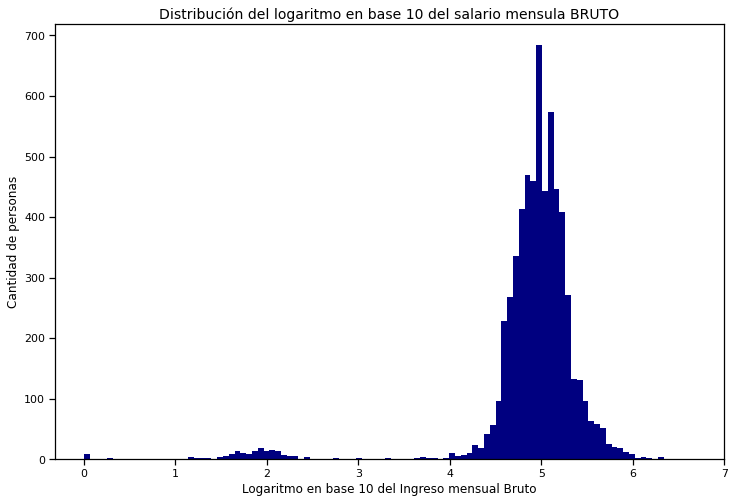

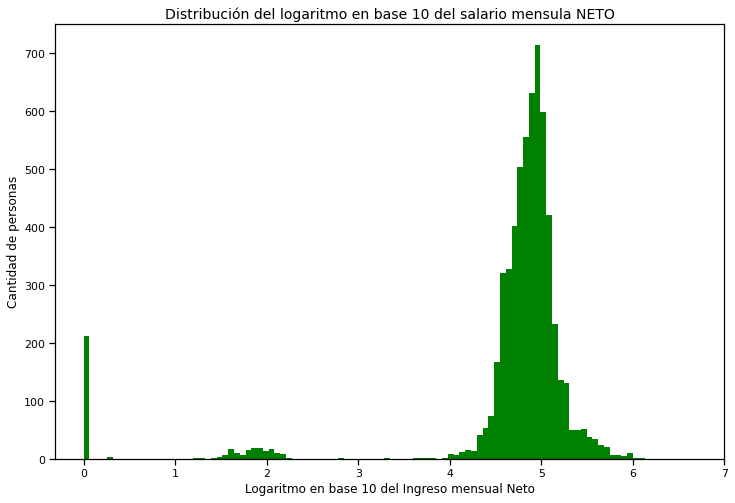

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(np.log10(df2.salary_monthly_BRUTO), bins=100, color='navy')
plt.title('Distribución del logaritmo en base 10 del salario mensula BRUTO', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim(right=7)
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df2.salary_monthly_NETO+1), bins=100, color='green') # La adición de 1 evita errores de cálculo del logaritmo
plt.title('Distribución del logaritmo en base 10 del salario mensula NETO', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Neto')
plt.ylabel('Cantidad de personas')
plt.xlim(right=7)
plt.show()

> Una primera limpieza de datos consiste en quitar los registros de los que NO trabajan full-time. Comparar solamente los salrios de los que trabajan full-time será equitativo y llevará a conclusiones correctas.

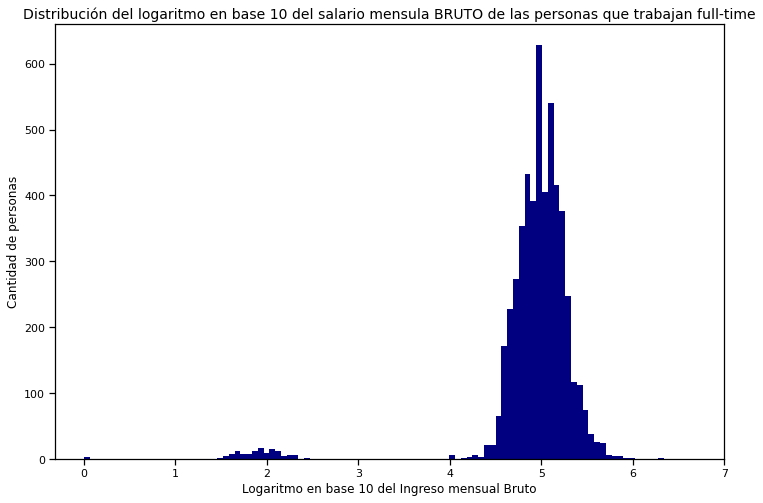

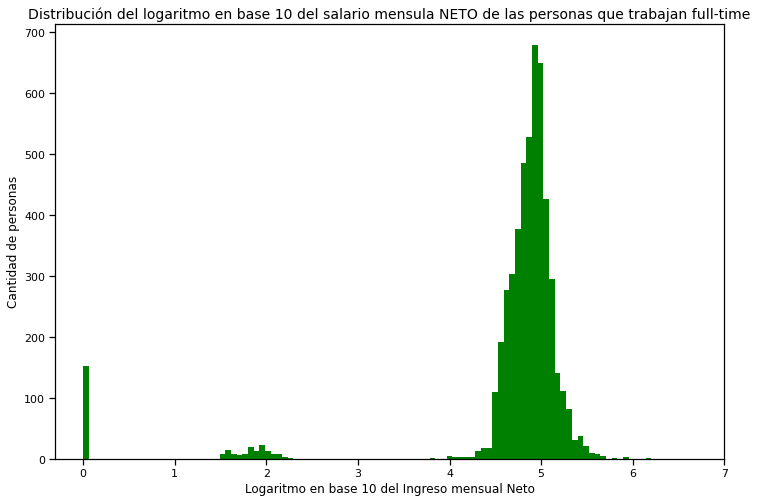

,Sin filtrado,Primer filtrado
Mediana del bruto,96000.000000,100000.000000
Mediana del neto,75000.000000,77600.000000
Media del bruto,124058.549621,116746.200316
Media del neto,91606.803046,84847.344179


In [ ]:
df3 = df2[df2.full_time == 1]

plt.figure(figsize=(12,8))
plt.hist(np.log10(df3.salary_monthly_BRUTO), bins=100, color='navy')
plt.title('Distribución del logaritmo en base 10 del salario mensula BRUTO de las personas que trabajan full-time', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim(right=7)
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df3.salary_monthly_NETO + 1), bins=100, color='green')
plt.title('Distribución del logaritmo en base 10 del salario mensula NETO de las personas que trabajan full-time', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Neto')
plt.ylabel('Cantidad de personas')
plt.xlim(right=7)
plt.show()

resumen2 = pd.DataFrame([df3.salary_monthly_BRUTO.median(),
                         df3.salary_monthly_NETO.median(),
                         df3.salary_monthly_BRUTO.mean(),
                         df3.salary_monthly_NETO.mean()], columns=['Primer filtrado'], index=ind)

resumen = pd.concat([resumen, resumen2], axis=1)
resumen

> Tras la observación de valores de salarios menores a $10000 (log 10000 = 4) se toma la siguiente decisión en cuanto una segunda limpieza de registros (filas):

> * Se quitan los registros de quienes no programan en ningún lenguaje.
> * Se quitan los registros de salarios menores a $10000.
> * Se quitan los registros de los que declaran cobrar en dólares. En un análisis por fuera de lo que consta en este entregable se pudo apreciar que aún cuando los valores declarados fueran en dólares, los montos tan pequeños no tienen sentido ni aún convirtiéndolos a pesos.

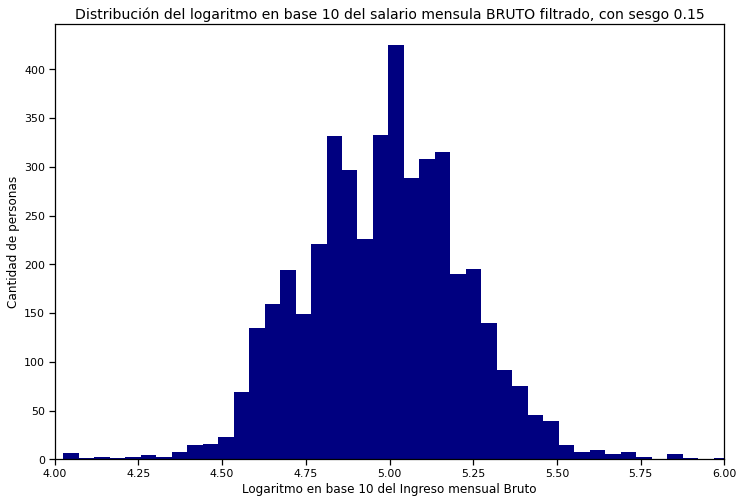

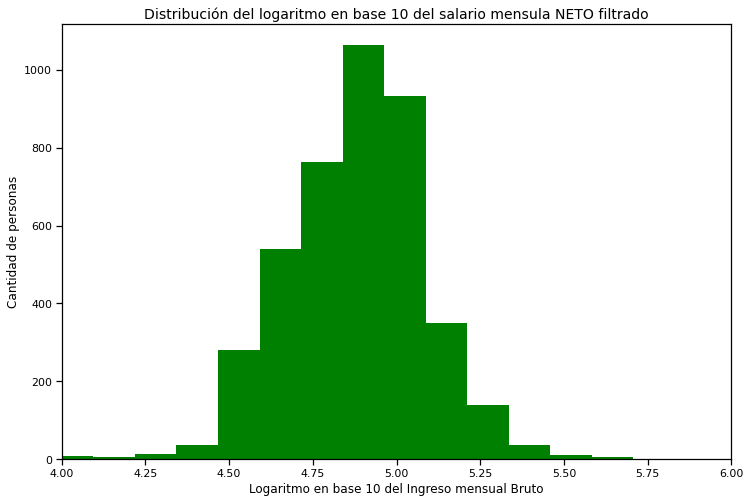

,Sin filtrado,Primer filtrado,Segundo filtrado
Mediana del bruto,96000.000000,100000.000000,99000.000000
Mediana del neto,75000.000000,77600.000000,76000.000000
Media del bruto,124058.549621,116746.200316,113648.663039
Media del neto,91606.803046,84847.344179,81994.965795


In [ ]:
df4 = df3[df3.salary_monthly_BRUTO > 10000]
df4 = df4[df4.salary_in_usd == 0]
df4 = df4[df4.tools_programming_languages != 'Ninguno']
df4.drop(["salary_in_usd", "work_contract_type", "full_time"], axis=1, inplace=True)

sesgo_sal_bruto = np.log10(df4.salary_monthly_BRUTO).skew()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df4.salary_monthly_BRUTO), bins=50, color='navy')
plt.title(f'Distribución del logaritmo en base 10 del salario mensula BRUTO filtrado, con sesgo {sesgo_sal_bruto:.2f}', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim([4, 6])
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df4.salary_monthly_NETO + 1), bins=50, color='green')
plt.title(f'Distribución del logaritmo en base 10 del salario mensula NETO filtrado', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim([4, 6])
plt.show()

resumen3 = pd.DataFrame([df4.salary_monthly_BRUTO.median(),
                         df4.salary_monthly_NETO.median(),
                         df4.salary_monthly_BRUTO.mean(),
                         df4.salary_monthly_NETO.mean()], columns=['Segundo filtrado'], index=ind)

resumen = pd.concat([resumen, resumen3], axis=1)
resumen

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

> Es de esperar que los salarios brutos y neto estén altamente correlacionados.

<Figure size 720x432 with 0 Axes>

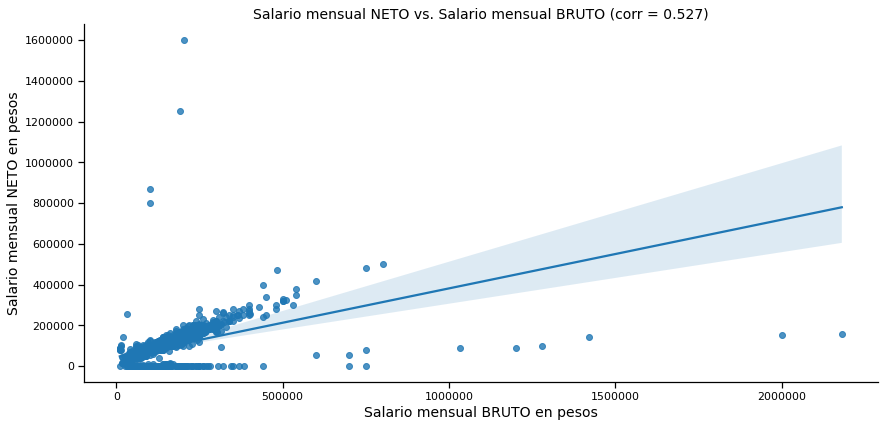

In [ ]:
corr_bruto_neto = df4.salary_monthly_NETO.corr(df4.salary_monthly_BRUTO)

plt.figure(figsize=(10, 6))
sns.lmplot(x="salary_monthly_BRUTO", y="salary_monthly_NETO", data=df4, height=6, aspect=2)
plt.title(f'Salario mensual NETO vs. Salario mensual BRUTO (corr = {corr_bruto_neto:.3f})', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Salario mensual BRUTO en pesos', fontsize=14)
plt.ylabel('Salario mensual NETO en pesos', fontsize=14)
plt.show()

> Contrariamente a lo que se esperaba, la correlación entre salarios brutos y netos es menor a 1.
Esto se debe principalmente a la ausencia de registros de valores de salarios netos para los que existen valores de salarios brutos.
>
> En la figura anterior se puede observar que los _outliers_ corresponden a registros en los que la relación de salario bruto/neto es alta.
>
> Como se espera que los salarios brutos y neto estén altamente correlacionados, un cuarto filtro consiste en eliminar valores anormales de relación bruto/neto.

<Figure size 720x432 with 0 Axes>

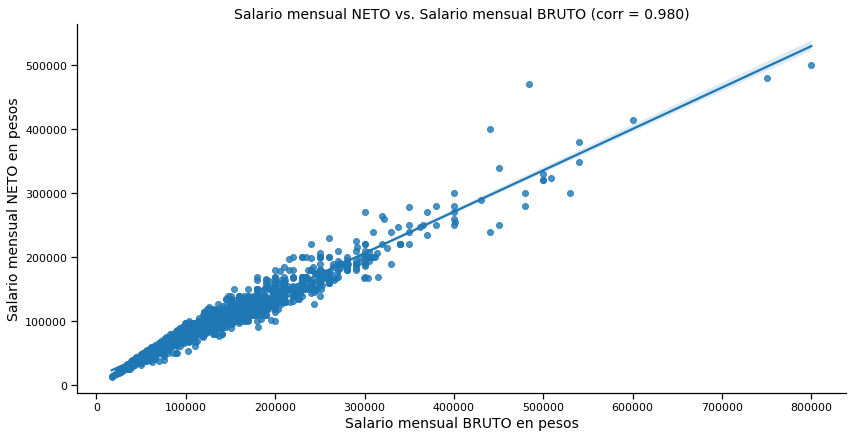

,Sin filtrado,Primer filtrado,Segundo filtrado,Cuarto filtrado
Mediana del bruto,96000.000000,100000.000000,99000.000000,100000.000000
Mediana del neto,75000.000000,77600.000000,76000.000000,80000.000000
Media del bruto,124058.549621,116746.200316,113648.663039,111996.180869
Media del neto,91606.803046,84847.344179,81994.965795,85020.701825


In [ ]:
df5 = df4[df4.rel_bruto_neto > 1]
df5 = df5[df5.rel_bruto_neto < 2]

corr_bruto_neto = df5.salary_monthly_NETO.corr(df5.salary_monthly_BRUTO)

plt.figure(figsize=(10, 6))
sns.lmplot(x="salary_monthly_BRUTO", y="salary_monthly_NETO", data=df5, height=6, aspect=2)
plt.title(f'Salario mensual NETO vs. Salario mensual BRUTO (corr = {corr_bruto_neto:.3f})', fontsize=14)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Salario mensual BRUTO en pesos', fontsize=14)
plt.ylabel('Salario mensual NETO en pesos', fontsize=14)
plt.show()

resumen4 = pd.DataFrame([df5.salary_monthly_BRUTO.median(),
                         df5.salary_monthly_NETO.median(),
                         df5.salary_monthly_BRUTO.mean(),
                         df5.salary_monthly_NETO.mean()], columns=['Cuarto filtrado'], index=ind)

resumen = pd.concat([resumen, resumen4], axis=1)
resumen

In [ ]:
df5.describe()

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,rel_bruto_neto,cant_lenguajes
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,111996.180869,85020.701825,8.983525,1.284105,3.029294
std,64279.946135,42361.294194,7.264472,0.129126,2.366367
min,17000.000000,14000.000000,0.000000,1.004177,0.000000
25%,68000.000000,56000.000000,3.000000,1.204359,1.000000
50%,100000.000000,80000.000000,7.000000,1.249984,3.000000
75%,140000.000000,103000.000000,13.000000,1.352925,4.000000
max,800000.000000,500000.000000,115.000000,1.999980,17.000000


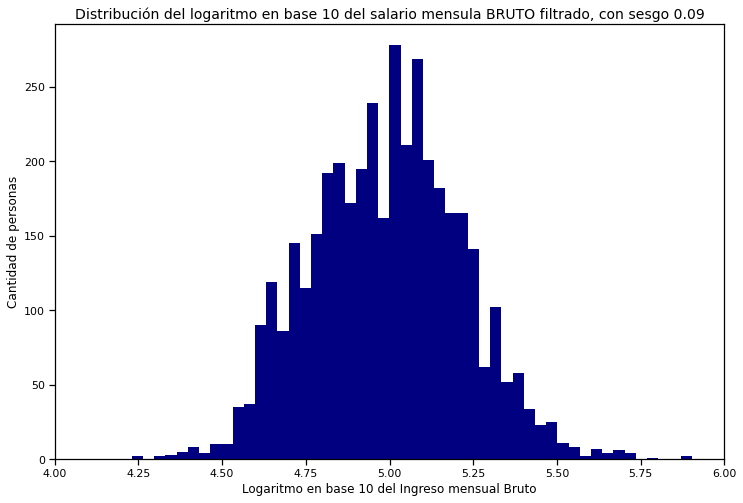

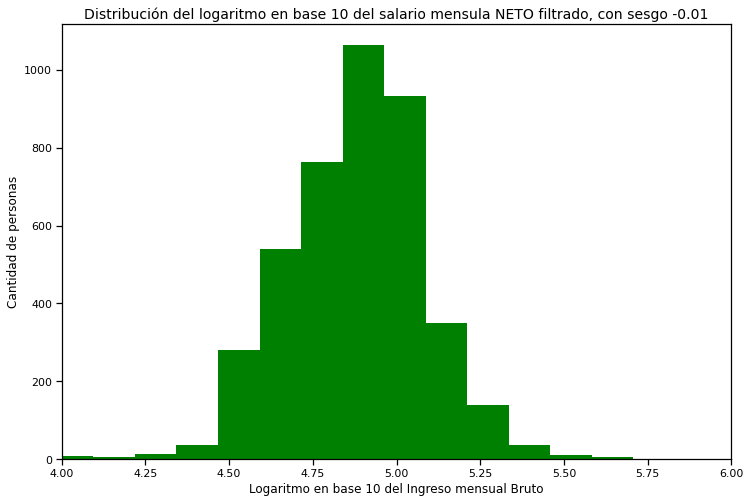

In [ ]:
sesgo_sal_bruto = np.log10(df5.salary_monthly_BRUTO).skew()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df5.salary_monthly_BRUTO), bins=50, color='navy')
plt.title(f'Distribución del logaritmo en base 10 del salario mensula BRUTO filtrado, con sesgo {sesgo_sal_bruto:.2f}', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim([4, 6])
plt.show()

sesgo_sal_neto = np.log10(df5.salary_monthly_NETO).skew()

plt.figure(figsize=(12,8))
plt.hist(np.log10(df4.salary_monthly_NETO + 1), bins=50, color='green')
plt.title(f'Distribución del logaritmo en base 10 del salario mensula NETO filtrado, con sesgo {sesgo_sal_neto:.2f}', fontsize=14)
plt.xlabel('Logaritmo en base 10 del Ingreso mensual Bruto')
plt.ylabel('Cantidad de personas')
plt.xlim([4, 6])
plt.show()

> Después de la limpieza de datos se disponde de un dataframe con 3994 datos, con valores de salarios neto y bruto fuertemente correlacionados y con una distribución simétrica del logaritmo de los salrios.
>
> En virtud de esto se decide conservar la columna de salario bruto.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables (nivel de estudio y salario neto) son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación

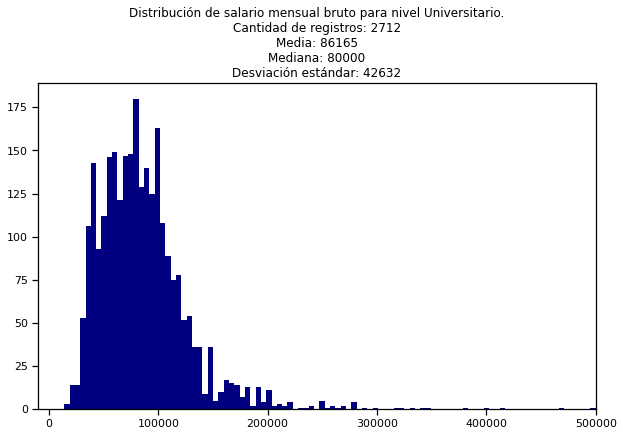

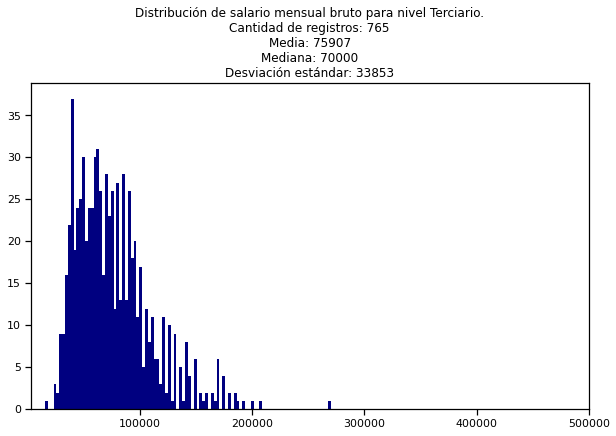

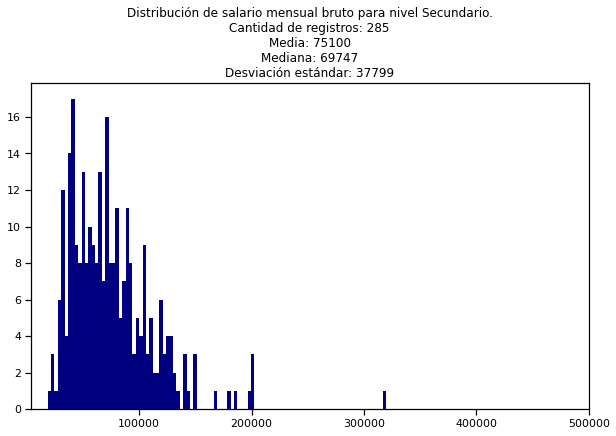

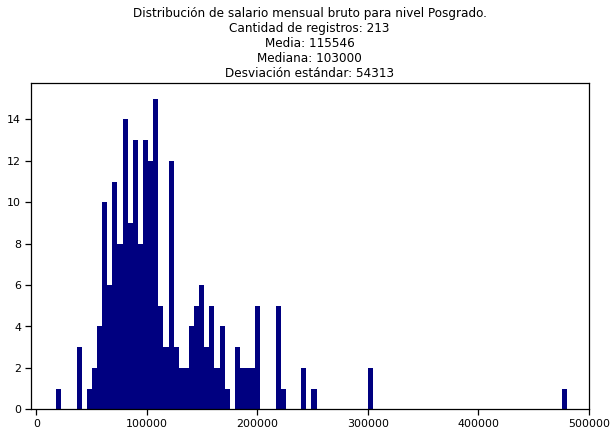

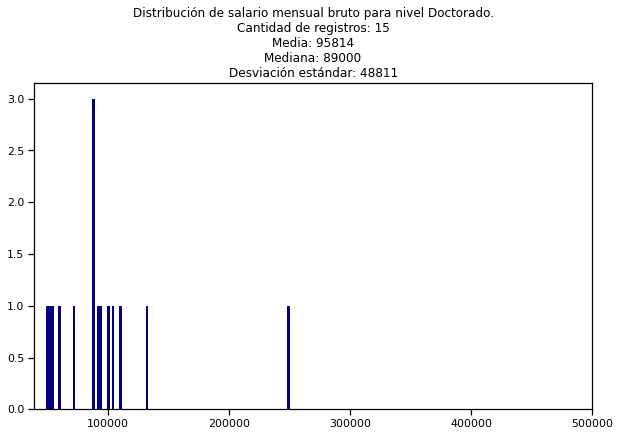

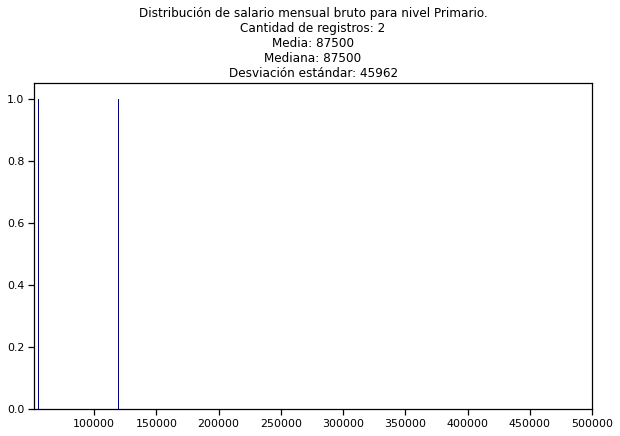

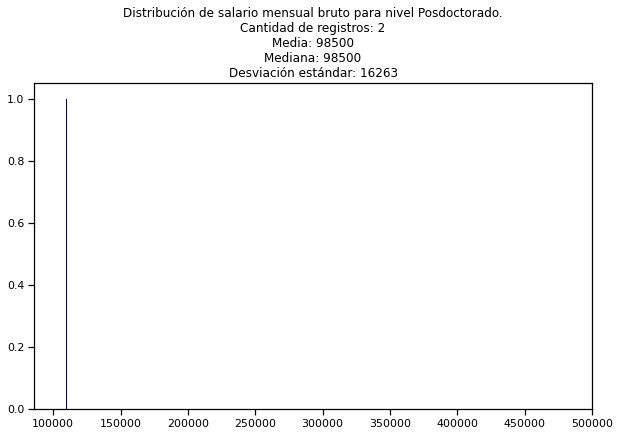

In [ ]:
for studie_level in df5.profile_studies_level.value_counts().index:
    df_provisorio = df5.salary_monthly_NETO[df5.profile_studies_level == studie_level]
    cant_reg = len(df_provisorio)
    media = df_provisorio.mean()
    mediana = df_provisorio.median()
    desv_std = df_provisorio.std()
    titulo = (f'Distribución de salario mensual bruto para nivel {studie_level}.\n'+
              f'Cantidad de registros: {cant_reg}\n'+
              f'Media: {media:.0f}\n'+
              f'Mediana: {mediana:.0f}\n'+
              f'Desviación estándar: {desv_std:.0f}')
    plt.figure(figsize=(10, 6))
    plt.hist(df_provisorio, bins=100, color='navy')
    plt.xlim(right=500000)
    plt.title(titulo)
    plt.show

> Las dos subpoblaciones más numerosas son:
> * Universitarios
> * Terciarios

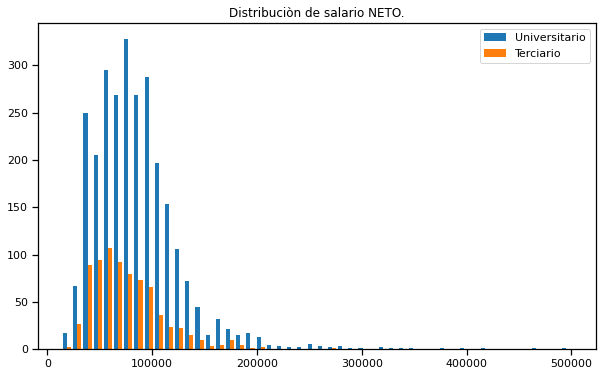

La media del salario neto de un universitario es: 86165
La mediana del salario neto de un universitario es: 80000
La desviación estándar del salario neto de un universitario es: 42632
La media del salario neto de un terciario es: 75907
La mediana del salario neto de un terciario es: 70000
La desviación estándar del salario neto de un terciario es: 33853


In [ ]:
universitario = df5.salary_monthly_NETO[df5.profile_studies_level == 'Universitario']
terciario = df5.salary_monthly_NETO[df5.profile_studies_level == 'Terciario']

plt.figure(figsize=(10, 6))
plt.hist([universitario, terciario], bins=50)
plt.legend(['Universitario', 'Terciario'])
plt.title('Distribuciòn de salario NETO.')
plt.show()

print(f'La media del salario neto de un universitario es: {universitario.mean():.0f}')
print(f'La mediana del salario neto de un universitario es: {universitario.median():.0f}')
print(f'La desviación estándar del salario neto de un universitario es: {universitario.std():.0f}')
print(f'La media del salario neto de un terciario es: {terciario.mean():.0f}')
print(f'La mediana del salario neto de un terciario es: {terciario.median():.0f}')
print(f'La desviación estándar del salario neto de un terciario es: {terciario.std():.0f}')

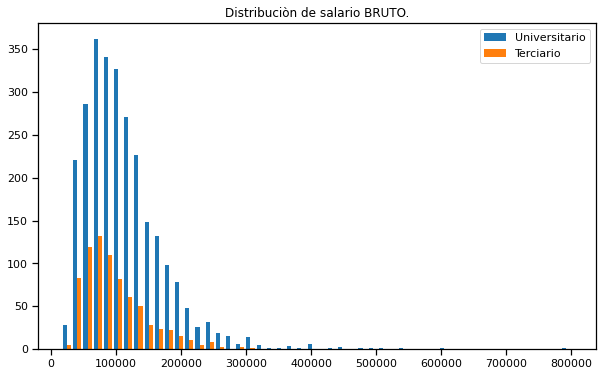

La media del salario bruto de un universitario es: 113735
La mediana del salario bruto de un universitario es: 100000
La desviación estándar del salario bruto de un universitario es: 64321
La media del salario bruto de un terciario es: 97922
La mediana del salario bruto de un terciario es: 86000
La desviación estándar del salario bruto de un terciario es: 49931


In [ ]:
universitario = df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Universitario']
terciario = df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Terciario']

plt.figure(figsize=(10, 6))
plt.hist([universitario, terciario], bins=50)
plt.legend(['Universitario', 'Terciario'])
plt.title('Distribuciòn de salario BRUTO.')
plt.show()

print(f'La media del salario bruto de un universitario es: {universitario.mean():.0f}')
print(f'La mediana del salario bruto de un universitario es: {universitario.median():.0f}')
print(f'La desviación estándar del salario bruto de un universitario es: {universitario.std():.0f}')
print(f'La media del salario bruto de un terciario es: {terciario.mean():.0f}')
print(f'La mediana del salario bruto de un terciario es: {terciario.median():.0f}')
print(f'La desviación estándar del salario bruto de un terciario es: {terciario.std():.0f}')

> Se puede concluir que los que tienen niveles de estudios universitarios tienen en promedio mejores salarios que los de preparación terciaria. En ambos casos la dispersión de los datos es importante.
>
> La independencia de variables se puede verificar medinte el método de Chi cuadrado.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)

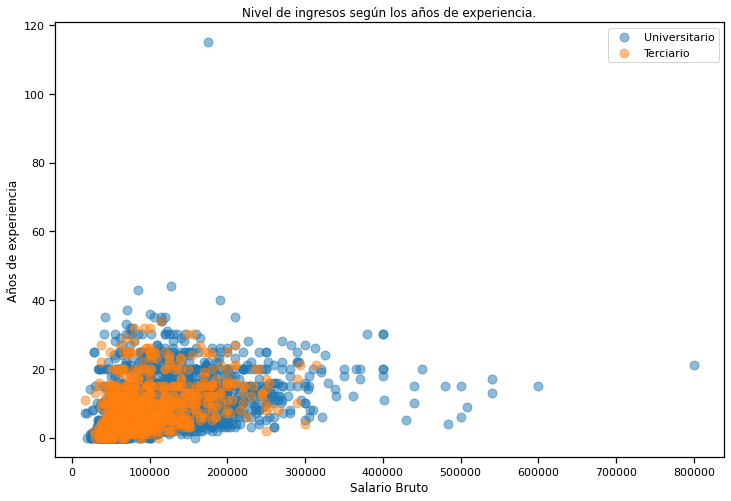

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Universitario'],
            df5.profile_years_experience[df5.profile_studies_level == 'Universitario'],
            alpha=0.5, s=80)
plt.scatter(df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Terciario'],
            df5.profile_years_experience[df5.profile_studies_level == 'Terciario'],
            alpha=0.5, s=80)
plt.legend(['Universitario', 'Terciario'])
plt.xlabel('Salario Bruto')
plt.ylabel('Años de experiencia')
plt.title('Nivel de ingresos según los años de experiencia.')
plt.show()

> Una primera lectura de la figura anterior permite ver que hay muy pocos casos de salarios mayores $400000 y de más de 40 años de experiencia.
>
> Se detecta además un dato evidentemente falso en el que se declaró más de 110 años de experiencia.
>
> Para mayor claridad se realiza un acercamiento a la población más densa de datos.

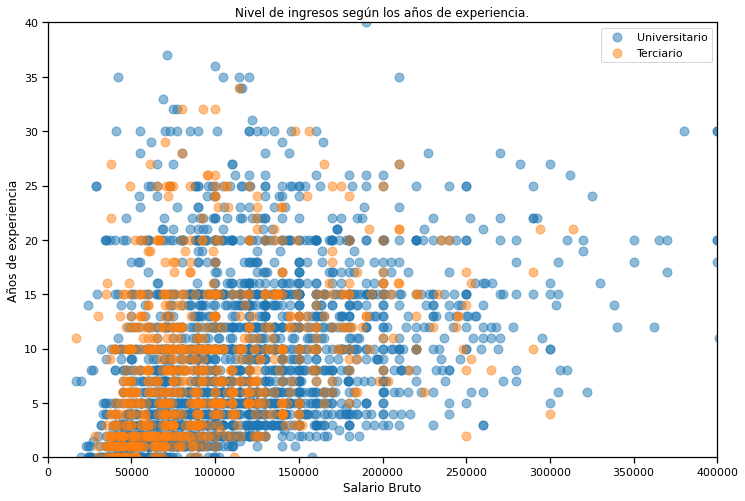

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Universitario'],
            df5.profile_years_experience[df5.profile_studies_level == 'Universitario'],
            alpha=0.5, s=80)
plt.scatter(df5.salary_monthly_BRUTO[df5.profile_studies_level == 'Terciario'],
            df5.profile_years_experience[df5.profile_studies_level == 'Terciario'],
            alpha=0.5, s=80)
plt.legend(['Universitario', 'Terciario'])
plt.xlim([0, 400000])
plt.ylim([0, 40])
plt.xlabel('Salario Bruto')
plt.ylabel('Años de experiencia')
plt.title('Nivel de ingresos según los años de experiencia.')
plt.show()

> CONCLUSIÍON: En base a la dispersión que se aprecia en la figura, para ambos niveles de estudio no se aprecia correlación entre años de experiencia y salario.